# Imports

In [1]:
from starvers.starvers import TripleStoreEngine
print("Loaded Triple store")
from rdflib import Graph, Namespace, RDF, RDFS, Literal, URIRef
import uuid
import datetime
from datetime import timezone

from scipy.io import arff
import pandas as pd
print("import 2 done")
# new imports
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
print("import 3 done") 
from pathlib import Path
from typing import Tuple

import sys

Loaded Triple store
import 2 done
import 3 done


**!!!IMPORTANT!!!**

Everytime you work on this notebook, enter your student ID in the `executed_by` variable so that the cell executions are accredited to you.

In [2]:
#Ben
executed_by ='stud-id_12038369'

#Philipp
#executed_by ='stud-id_12132552'

Ontologies to use
* Provenance of the experiment process
    * PROV-O: 
        * doc: https://www.w3.org/TR/prov-o/
        * serialization: https://www.w3.org/ns/prov-o
* Data used and created
    * schema.org - Dataset: 
        * doc: https://schema.org/Dataset
        * serialization: https://schema.org/version/latest/schemaorg-current-https.ttl
    * Crossaint
        * doc: https://docs.mlcommons.org/croissant/docs/croissant-spec.html
        * serialization: https://github.com/mlcommons/croissant/blob/main/docs/croissant.ttl
* ML experiments performed
    * MLSO: 
        * doc: https://github.com/dtai-kg/MLSO
        * doc: https://dtai-kg.github.io/MLSO/#http://w3id.org/
        * serialization: https://dtai-kg.github.io/MLSO/ontology.ttl
* Measurements, Metrics, Units
    * QUDT
        * doc:https://qudt.org/
        * doc: https://github.com/qudt/qudt-public-repo
        * serialization: https://github.com/qudt/qudt-public-repo/blob/main/src/main/rdf/schema/SCHEMA_QUDT.ttl
    * SI Digital Framework
        * doc: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/docs/README.md
        * doc: https://si-digital-framework.org/
        * doc: https://si-digital-framework.org/SI
        * serialization: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/TTL/si.ttl
    * Quantities and Units
        * doc: https://www.omg.org/spec/Commons
        * serialization: https://www.omg.org/spec/Commons/QuantitiesAndUnits.ttl

# Graph-based documentation preliminaries

Set your group and student IDs. Do this only once.

In [3]:
# group id for this project
group_id = '13'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_12038369'  # benicios MA Nummer
student_b = 'stud-id_12132552'  # philipps MA Nummer

In [4]:
# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

Setup the starvers API for logging your steps into our server-sided graph database.

In [5]:
# Triple Store Endpoints
get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

# old endpoints
# get_endpoint = "https://starvers.ec.tuwien.ac.at/SOS2025"
# post_endpoint = "https://starvers.ec.tuwien.ac.at/SOS2025/statements"

Use these prefixes in your notebooks. You can extend this dict with your prefixes of additional ontologies that you use in this notebook.

In [6]:
prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/', # replace SOS2025 with BI2025 because otherwise did not work
}

In [7]:
def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

Register yourself in the Knowledge Graph using ProvO.

In [8]:
# Ontologies used: foaf, prov, IAO

# Benicio Daniel
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Benicio" .',
f':{student_a} foaf:familyName "Daniel" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "12038369"^^xsd:string .',
]
# Philipp Schott
reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Philipp" .',
f':{student_b} foaf:familyName "Schott" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "12132552"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

**What not do do**

Do not use [blank nodes](https://www.w3.org/wiki/BlankNodes).

PROV-O uses blank nodes to connect multiple elements with each other.
Such blank nodes (such as _:association) should not be used.
Instead, assign a fixed node ID such as
:5119fcd7-b571-41e0-9464-a37c7be0f574 by generating them outside of the
notebook.
We suggest that, for each setting where such a blank node is needed to
connect multiple elements, you create a unique hash (using uuid.uuid4())
and keep this as hard-coded identifier for the blank node. The template
notebook contains examples of this. Do *not* use these provided values,
as otherwise, your provenance documentations will all be connected via
these identifiers!
Also, do not generate them dynamically in every cell execution, e.g. by
using uuid.uuid4() in a cell. This would generate many new linking nodes
for connecting the same elements.
Compute one for each node (cell) where you need them and make sure to
use the same one on each re-execution of the notebook.

In [9]:
ASSOC_RUN1_EXEC = '0ff89396-5f86-4497-9b5e-26e5aba9ca55'

In [10]:

#DATASET_UUID   = str(uuid.uuid4())
#DIST_UUID      = str(uuid.uuid4())
#RECORDSET_UUID = str(uuid.uuid4())

#print("DATASET_UUID =", DATASET_UUID)
#print("DIST_UUID =", DIST_UUID)
#print("RECORDSET_UUID =", RECORDSET_UUID)

In [11]:
# --- 2. Hard-code the UUIDs (example values — replace with yours) ---
DATASET_UUID = "d60ba562-ba83-4f5b-8951-6918e9e43539"
DIST_UUID = "51207666-9e42-4a62-82e2-cef6b56c70e8"
RECORDSET_UUID = "0ca825e0-8119-4803-bd95-d8e4f89ccb28"

DATASET_ID   = f"dataset-{DATASET_UUID}"
DIST_ID      = f"dist-{DIST_UUID}"
RECORDSET_ID = f"rs-{RECORDSET_UUID}"

dataset_description = """
The dataset contains person-level records from the Fatality Analysis Reporting System (FARS),
describing individuals involved in fatal traffic accidents in the United States.
It includes demographic, vehicle-related, and accident-related attributes.
The target variable class represents the injury severity outcome and is used for classification.
"""

dataset_triples = [
    f':{DATASET_ID} rdf:type sc:Dataset .',
    f':{DATASET_ID} sc:name "FARS Traffic Accident Person-Level Dataset"^^xsd:string .',
    f':{DATASET_ID} sc:description """{dataset_description}"""^^xsd:string .',

    f':{DATASET_ID} sc:license "https://opendatacommons.org/licenses/odbl/"^^xsd:anyURI .',
    f':{DATASET_ID} sc:url "https://www.openml.org/d/40672"^^xsd:anyURI .',
    f':{DATASET_ID} sc:keywords "traffic accidents, FARS, OpenML, SOM, classification"^^xsd:string .',

    # Distribution (where the data can be fetched)
    f':{DATASET_ID} sc:distribution :{DIST_ID} .',
    f':{DIST_ID} rdf:type sc:DataDownload .',
    f':{DIST_ID} sc:contentUrl "file://data/fars.arff"^^xsd:anyURI .',
    f':{DIST_ID} sc:encodingFormat "application/arff"^^xsd:string .',
]

croissant_description = """
Each record corresponds to one person involved in a fatal traffic accident.
Rows represent individual persons, columns represent attributes such as age, sex,
vehicle characteristics, accident conditions, and injury outcome.
"""

croissant_triples = [
    f':{DATASET_ID} cr:recordSet :{RECORDSET_ID} .',
    f':{RECORDSET_ID} rdf:type cr:RecordSet .',
    f':{RECORDSET_ID} cr:description """{croissant_description}"""^^xsd:string .',
    # Add fields (columns) similarly if you want (cr:Field), one per feature/label.
]

engine.insert(dataset_triples + croissant_triples, prefixes=prefixes)

# Business Understanding

In [12]:
## Each Activity that follows is part of the Business Understanding Phase

business_understanding_phase_executor = [
f':business_understanding_phase rdf:type prov:Activity .',
f':business_understanding_phase rdfs:label "Business Understanding Phase" .', ## Phase 1: Business Understanding
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)

In [13]:
#############################################
# Documentation
#############################################

BU_ASSOC = "bu_assoc_01"

bu_comment = """
This project analyzes the given dataset to better understand its structure, quality, and suitability for subsequent modeling steps as part of the SOS assignment.
"""

business_understanding_activity = [
    ':business_understanding rdf:type prov:Activity .',
    ':business_understanding sc:isPartOf :business_understanding_phase .',
    ':business_understanding rdfs:label "Business Understanding" .',
    f':business_understanding rdfs:comment """{bu_comment}""" .',

    f':business_understanding prov:qualifiedAssociation :{BU_ASSOC} .',
    f':{BU_ASSOC} rdf:type prov:Association .',
    f':{BU_ASSOC} prov:agent :{executed_by} .',
    f':{BU_ASSOC} prov:hadRole :{code_executor_role} .',
]
engine.insert(business_understanding_activity, prefixes=prefixes)

# Data Understanding

In [14]:
## Each Activity that follows is part of the Data Understanding Phase

data_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', ## Phase 2: Data Understanding
]
engine.insert(data_understanding_phase_executor, prefixes=prefixes)

In [15]:
load_fars_data_writer = student_b  # Philipp Schott

def load_fars_data() -> pd.DataFrame:
    """Load FARS data and return as DataFrame."""

    # Load ARFF file and convert to DataFrame
    arff_file = arff.loadarff('../data/fars.arff')
    df_fars = pd.DataFrame(arff_file[0])
    df_fars_meta = pd.DataFrame(arff_file[1])
    return df_fars, df_fars_meta

# Execution of the data loading activity
start_time_load_fars = now()
df_fars, df_fars_meta = load_fars_data()
end_time_load_fars = now()

display(df_fars.head())
display(df_fars_meta)
display(df_fars.dtypes)
display(df_fars.shape)
display(df_fars.nunique())

#############################################
# Documentation
#############################################
DU_ASSOC_LOAD_FARS = "du_assoc_load_fars_01"
DU_ASSOC_LOAD_FARS_EX = "du_assoc_load_fars_exec_01"

du_comment_load_fars = """
The dataset is provided in ARFF format and consists of approximately 100,000 person-level traffic accident records with 30 variables. 
It contains a mixture of numerical attributes and a large number of categorical variables encoded as byte or object values. 
The variable 'class' represents the target outcome. 
Initial inspection indicates that decoding and categorical encoding will be required in the Data Preparation phase. 
No data transformations were applied at this stage.
"""

data_understanding_load_fars_activity = [
    ':data_understanding_load_fars rdf:type prov:Activity .',
    ':data_understanding_load_fars sc:isPartOf :data_understanding_phase .',
    ':data_understanding_load_fars rdfs:label "Load FARS Data" .',
    f':data_understanding_load_fars rdfs:comment """{du_comment_load_fars}""" .',
    f':data_understanding_load_fars prov:startedAtTime "{start_time_load_fars}"^^xsd:dateTime .',
    f':data_understanding_load_fars prov:endedAtTime "{end_time_load_fars}"^^xsd:dateTime .',

    f':data_understanding_load_fars prov:qualifiedAssociation :{DU_ASSOC_LOAD_FARS} .',
    f':{DU_ASSOC_LOAD_FARS} rdf:type prov:Association .',
    f':{DU_ASSOC_LOAD_FARS} prov:agent :{load_fars_data_writer} .',
    f':{DU_ASSOC_LOAD_FARS} prov:hadRole :{code_executor_role} .',

    f':data_understanding_load_fars prov:qualifiedAssociation :{DU_ASSOC_LOAD_FARS_EX} .',
    f':{DU_ASSOC_LOAD_FARS_EX} rdf:type prov:Association .',
    f':{DU_ASSOC_LOAD_FARS_EX} prov:agent :{executed_by} .',
    f':{DU_ASSOC_LOAD_FARS_EX} prov:hadRole :{code_executor_role} .',
]
engine.insert(data_understanding_load_fars_activity, prefixes=prefixes)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,class
0,0.0,34.0,b'1',b'1',3.0,7.0,2.0,b'2',b'9',b'1',...,0.0,b'2',0.0,b'5',b'0',27.0,29.0,19.0,17.0,b'1'
1,0.0,20.0,b'1',b'1',3.0,7.0,9.0,b'2',b'9',b'1',...,0.0,b'2',0.0,b'5',b'0',27.0,29.0,19.0,17.0,b'1'
2,0.0,43.0,b'1',b'1',3.0,5.0,4.0,b'0',b'0',b'0',...,0.0,b'2',0.0,b'5',b'0',27.0,29.0,19.0,4.0,b'1'
3,0.0,38.0,b'0',b'6',6.0,5.0,4.0,b'0',b'0',b'0',...,0.0,b'2',0.0,b'6',b'2',27.0,29.0,19.0,11.0,b'2'
4,0.0,50.0,b'1',b'1',3.0,5.0,9.0,b'0',b'0',b'1',...,0.0,b'2',0.0,b'5',b'2',27.0,29.0,19.0,4.0,b'1'


,0
0,CASE_STATE
1,AGE
2,SEX
3,PERSON_TYPE
4,SEATING_POSITION
5,RESTRAINT_SYSTEM-USE
6,AIR_BAG_AVAILABILITY/DEPLOYMENT
7,EJECTION
8,EJECTION_PATH
9,EXTRICATION


CASE_STATE                             float64
AGE                                    float64
SEX                                     object
PERSON_TYPE                             object
SEATING_POSITION                       float64
RESTRAINT_SYSTEM-USE                   float64
AIR_BAG_AVAILABILITY/DEPLOYMENT        float64
EJECTION                                object
EJECTION_PATH                           object
EXTRICATION                             object
NON_MOTORIST_LOCATION                  float64
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     object
METHOD_ALCOHOL_DETERMINATION            object
ALCOHOL_TEST_TYPE                       object
ALCOHOL_TEST_RESULT                    float64
POLICE-REPORTED_DRUG_INVOLVEMENT        object
METHOD_OF_DRUG_DETERMINATION            object
DRUG_TEST_TYPE                          object
DRUG_TEST_RESULTS_(1_of_3)             float64
DRUG_TEST_TYPE_(2_of_3)                 object
DRUG_TEST_RESULTS_(2_of_3)             float64
DRUG_TEST_TYP

(100968, 30)

CASE_STATE                             51
AGE                                    99
SEX                                     3
PERSON_TYPE                            10
SEATING_POSITION                       26
RESTRAINT_SYSTEM-USE                   12
AIR_BAG_AVAILABILITY/DEPLOYMENT        13
EJECTION                                4
EJECTION_PATH                          10
EXTRICATION                             3
NON_MOTORIST_LOCATION                  18
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     4
METHOD_ALCOHOL_DETERMINATION            7
ALCOHOL_TEST_TYPE                      10
ALCOHOL_TEST_RESULT                    69
POLICE-REPORTED_DRUG_INVOLVEMENT        4
METHOD_OF_DRUG_DETERMINATION            5
DRUG_TEST_TYPE                          7
DRUG_TEST_RESULTS_(1_of_3)             95
DRUG_TEST_TYPE_(2_of_3)                 7
DRUG_TEST_RESULTS_(2_of_3)             73
DRUG_TEST_TYPE_(3_of_3)                 7
DRUG_TEST_RESULTS_(3_of_3)             59
HISPANIC_ORIGIN                   

The output shows that the dataset requirements are met and the data is loaded successfully.

# Data Preprocessing

In [16]:
## Each Activity that follows is part of the Data Preprocessing Phase

data_preprocessing_phase_executor = [
f':data_preprocessing_phase rdf:type prov:Activity .',
f':data_preprocessing_phase rdfs:label "Data Preprocessing Phase" .', ## Phase 3: Data Preprocessing
]
engine.insert(data_preprocessing_phase_executor, prefixes=prefixes)

In [17]:
load_fars_data_writer = student_b  # Philipp Schott

# Data Preprocessing
## Step 1: Decode byte-encoded categorical attributes
def bytes_object_to_category(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert byte-encoded / object-type categorical columns to pandas 'category' dtype.
    - Decodes byte strings to UTF-8
    - Converts resulting columns to 'category'
    - Leaves numeric columns untouched
    """
    df_out = df.copy()

    for col in df_out.columns:
        if df_out[col].dtype == object:
            df_out[col] = df_out[col].apply(
                lambda x: x.decode("utf-8") if isinstance(x, bytes) else x
            )
            df_out[col] = df_out[col].astype("category")

    return df_out

# Execute preprocessing step
start_time_decode = now()
df_fars_decoded = bytes_object_to_category(df_fars)
end_time_decode = now()

preprep_comment_decode = """
Now since I understand the data after decoding the byte-encoded categorical variables, I can see that the dataset is ready for further analysis and modeling.
In the next steps, I will explore the data distributions, check for missing values, and prepare the data for modeling.
"""

DP_ASSOC_DECODE_WRITER = "dp_assoc_decode_writer"
DP_ASSOC_DECODE_EXEC   = "dp_assoc_decode_exec"

data_preparation_decode_activity = [
    ':data_preparation_decode rdf:type prov:Activity .',
    ':data_preparation_decode sc:isPartOf :data_preprocessing_phase .',
    ':data_preparation_decode rdfs:label "Decode Categorical Attributes" .',
    f':data_preparation_decode rdfs:comment """{preprep_comment_decode}""" .',
    f':data_preparation_decode prov:startedAtTime "{start_time_decode}"^^xsd:dateTime .',
    f':data_preparation_decode prov:endedAtTime "{end_time_decode}"^^xsd:dateTime .',

    # Writer
    f':data_preparation_decode prov:qualifiedAssociation :{DP_ASSOC_DECODE_WRITER} .',
    f':{DP_ASSOC_DECODE_WRITER} rdf:type prov:Association .',
    f':{DP_ASSOC_DECODE_WRITER} prov:agent :{load_fars_data_writer} .',
    f':{DP_ASSOC_DECODE_WRITER} prov:hadRole :{code_writer_role} .',

    # Executor
    f':data_preparation_decode prov:qualifiedAssociation :{DP_ASSOC_DECODE_EXEC} .',
    f':{DP_ASSOC_DECODE_EXEC} rdf:type prov:Association .',
    f':{DP_ASSOC_DECODE_EXEC} prov:agent :{executed_by} .',
    f':{DP_ASSOC_DECODE_EXEC} prov:hadRole :{code_executor_role} .',
]

engine.insert(data_preparation_decode_activity, prefixes=prefixes)

display(df_fars_decoded.head())
display(df_fars_decoded.dtypes)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,class
0,0.0,34.0,1,1,3.0,7.0,2.0,2,9,1,...,0.0,2,0.0,5,0,27.0,29.0,19.0,17.0,1
1,0.0,20.0,1,1,3.0,7.0,9.0,2,9,1,...,0.0,2,0.0,5,0,27.0,29.0,19.0,17.0,1
2,0.0,43.0,1,1,3.0,5.0,4.0,0,0,0,...,0.0,2,0.0,5,0,27.0,29.0,19.0,4.0,1
3,0.0,38.0,0,6,6.0,5.0,4.0,0,0,0,...,0.0,2,0.0,6,2,27.0,29.0,19.0,11.0,2
4,0.0,50.0,1,1,3.0,5.0,9.0,0,0,1,...,0.0,2,0.0,5,2,27.0,29.0,19.0,4.0,1


CASE_STATE                              float64
AGE                                     float64
SEX                                    category
PERSON_TYPE                            category
SEATING_POSITION                        float64
RESTRAINT_SYSTEM-USE                    float64
AIR_BAG_AVAILABILITY/DEPLOYMENT         float64
EJECTION                               category
EJECTION_PATH                          category
EXTRICATION                            category
NON_MOTORIST_LOCATION                   float64
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    category
METHOD_ALCOHOL_DETERMINATION           category
ALCOHOL_TEST_TYPE                      category
ALCOHOL_TEST_RESULT                     float64
POLICE-REPORTED_DRUG_INVOLVEMENT       category
METHOD_OF_DRUG_DETERMINATION           category
DRUG_TEST_TYPE                         category
DRUG_TEST_RESULTS_(1_of_3)              float64
DRUG_TEST_TYPE_(2_of_3)                category
DRUG_TEST_RESULTS_(2_of_3)              

In [18]:
prep_som_code_writer = student_b # Philipp Schott

# Step 2: Further preprocessing steps
# E.g., handling missing values, normalization, etc.

# Helper functions
def rank_scale(series: pd.Series) -> pd.Series:
    """
    Rank-based scaling to [0,1].
    Preserves order but not absolute distances.
    """
    ranks = series.rank(method="average")
    return (ranks - 1) / (ranks.max() - 1)

def reduce_categories(series: pd.Series, min_freq=0.01) -> pd.Series:
    """
    Reduce categories with lower frequency than min_freq.
    """
    freq = series.value_counts(normalize=True)
    keep = freq[freq >= min_freq].index
    return series.where(series.isin(keep), other="OTHER")

def simplex_encode_series(series: pd.Series) -> pd.DataFrame:
    """
    Exact regular simplex encoding for a categorical pandas Series.
    Produces k-1 dense features for k categories with
    exactly equal pairwise distances.
    """

    # 1. Force string labels (robust + reproducible)
    series = series.astype("string")

    categories = sorted(series.unique())
    k = len(categories)

    # 2. One-hot
    I = np.eye(k)

    # 3. Center
    C = I - np.ones((k, k)) / k

    # 4. Orthogonal basis of (k−1)-subspace
    Q, _ = np.linalg.qr(C.T)
    basis = Q[:, :k-1]

    # 5. Projection
    simplex = C @ basis

    # 6. Normalize
    simplex /= np.linalg.norm(simplex, axis=1, keepdims=True)

    # 7. Mapping
    mapping = {cat: simplex[i] for i, cat in enumerate(categories)}
    encoded = np.vstack([mapping[val] for val in series])

    return pd.DataFrame(
        encoded,
        index=series.index,
        columns=[f"{series.name}_sx{i}" for i in range(k - 1)]
    )

# Main function
def prepare_for_som(
    df: pd.DataFrame, 
    target_col: str, 
    numeric_cols: list, 
    ordinal_cols: list, 
    categorical_cols: list, 
    min_freq: float = 0.01,
    categorical_encoding: str = "onehot"  # "onehot" or "simplex"
    ) -> pd.DataFrame:
    """
    Prepare dataframe for SOM:
    - Numeric: Z-score
    - Ordinal: Rank scaling
    - Categorical: Category reduction by min_freq + One-Hot Encoding or simplex encoding (equidistant)
    """

    df_out = df.copy()

    # separate target
    y = df_out[target_col] if target_col in df_out else None
    X = df_out.drop(columns=[target_col], errors="ignore")

    # ---- Numeric: Z-score ----
    scaler_num = StandardScaler()
    X[numeric_cols] = scaler_num.fit_transform(X[numeric_cols])

    # ---- Ordinal: Rank scaling ----
    for col in ordinal_cols:
        X[col] = rank_scale(X[col])

    # ---- Categorical: reduce categories ----
    for col in categorical_cols:
        X[col] = X[col].astype("object")
        X[col] = reduce_categories(X[col], min_freq=min_freq)
        X[col] = X[col].astype("category")

    # ---- Encoding choice ----
    if categorical_encoding == "onehot":
        X = pd.get_dummies(
            X,
            columns=categorical_cols,
            dummy_na=False,
            drop_first=False
        )

    elif categorical_encoding == "simplex":

        simplex_parts = []
        for col in categorical_cols:
            simplex_parts.append(simplex_encode_series(X[col]))

        simplex_df = pd.concat(simplex_parts, axis=1)

        # scale ONLY simplex features
        scaler_cat = StandardScaler()
        simplex_df[simplex_df.columns] = scaler_cat.fit_transform(simplex_df)

        X = X.drop(columns=categorical_cols)
        X = pd.concat([X, simplex_df], axis=1)

    else:
        raise ValueError("categorical_encoding must be 'onehot' or 'simplex'")

    # reattach target
    if y is not None:
        X[target_col] = y.values

    return X

# recoding dtypes of columns so they make more sense
numeric_cols = [
    "AGE",                           # True continuous variable; differences and ratios are meaningful
    "ALCOHOL_TEST_RESULT",           # Measured alcohol concentration; metric distance is meaningful
    "DRUG_TEST_RESULTS_(1_of_3)",    # Quantitative test result; higher/lower values indicate intensity
    "DRUG_TEST_RESULTS_(2_of_3)",    # Same as above; treated as weakly continuous
    "DRUG_TEST_RESULTS_(3_of_3)"     # Same as above; treated as weakly continuous
]

# some may be querable as ordinal but it reduces dimensionality
ordinal_cols = [
    "SEATING_POSITION",              # Ordered seating locations; order matters, distances do not
    "RESTRAINT_SYSTEM-USE",          # Increasing level of restraint usage; ordinal severity
    "AIR_BAG_AVAILABILITY/DEPLOYMENT",  # Ordered states from unavailable to deployed
    "EJECTION",                      # Ordered outcome (none → partial → full ejection)
    "EXTRICATION",                   # Increasing rescue complexity; ordinal severity
    "POLICE_REPORTED_ALCOHOL_INVOLVEMENT",  # Ordered certainty (no → yes → unknown)
    "POLICE-REPORTED_DRUG_INVOLVEMENT",     # Same logic as alcohol involvement
    "TAKEN_TO_HOSPITAL"              # Binary but ordered by injury severity (no → yes)
]

categorical_cols = [
    "CASE_STATE",                    # Geographic identifier; numeric codes have no metric meaning
    "SEX",                           # Nominal demographic category; no inherent order
    "PERSON_TYPE",                   # Role-based category (driver, passenger, pedestrian)
    "EJECTION_PATH",                 # Type of ejection; categories are unordered
    "NON_MOTORIST_LOCATION",         # Location categories; no ordinal relationship
    "METHOD_ALCOHOL_DETERMINATION",  # Measurement method; method types are unordered
    "ALCOHOL_TEST_TYPE",             # Type of alcohol test; nominal categories
    "METHOD_OF_DRUG_DETERMINATION",  # Drug detection method; no ordering
    "DRUG_TEST_TYPE",                # Tested substance type; unordered categories
    "DRUG_TEST_TYPE_(2_of_3)",       # Same as above; additional test slot
    "DRUG_TEST_TYPE_(3_of_3)",       # Same as above; additional test slot
    "HISPANIC_ORIGIN",               # Demographic category; nominal, not ordinal
    "RELATED_FACTOR_(1)-PERSON_LEVEL",  # Contributing factor codes; labels without metric meaning
    "RELATED_FACTOR_(2)-PERSON_LEVEL",  # Same as above; unordered causal codes
    "RELATED_FACTOR_(3)-PERSON_LEVEL",  # Same as above; unordered causal codes
    "RACE"                           # Demographic category; nominal with no inherent order
]

# Execute preprocessing for SOM
start_som_prep = now()

# thresholds
min_freq_1 = 0.05
min_freq_2 = 0.01
min_freq_3 = 0.001

# fixed scaler / encoder names for documentation
scaler_num = "standard_scaler (z-score)"
scaler_ord = "rank_scaler"

scaler_cat_1 = "one_hot_encoder"
scaler_cat_2 = "simplex_equdistant_encoder"

# one-hot encoded
df_fars_scaled_5per100_oh = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=min_freq_1, categorical_encoding="onehot")
print("Loaded onehot 5%:", df_fars_scaled_5per100_oh.shape)

df_fars_scaled_1per100_oh = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=min_freq_2, categorical_encoding="onehot")
print("Loaded onehot 1%:", df_fars_scaled_1per100_oh.shape)

df_fars_scaled_1per1000_oh = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=min_freq_3, categorical_encoding="onehot")
print("Loaded onehot 0.1%:", df_fars_scaled_1per1000_oh.shape)

# simplex based encoding
df_fars_scaled_5per100_sb = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=0.05, categorical_encoding="simplex")
print("Loaded simplex 5%:", df_fars_scaled_5per100_sb.shape)

df_fars_scaled_1per100_sb = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=0.01, categorical_encoding="simplex")
print("Loaded simplex 1%:", df_fars_scaled_1per100_sb.shape)

df_fars_scaled_1per1000_sb = prepare_for_som(df_fars_decoded, target_col="class", numeric_cols=numeric_cols, ordinal_cols=ordinal_cols, 
                                            categorical_cols=categorical_cols, min_freq=0.001, categorical_encoding="simplex")
print("Loaded simplex 0.1%:", df_fars_scaled_1per1000_sb.shape)

end__som_prep = now()

preprep_comment_som = f"""
The dataset was preprocessed to make it suitable for Self-Organizing Map (SOM) training,
which is sensitive to feature scaling, sparsity, and distance geometry.
All features are converted to the appropriate data types after manually checking their interpretation.

Numeric features have been standardized using {scaler_num},
ordinal features have been standardized using {scaler_ord}.
Categorical attributes were first reduced using minimum-frequency thresholding to limit the
number of rare categories and mitigate sparsity.

Two alternative categorical encoding strategies were prepared:
(1) classical {scaler_cat_1}, resulting in a sparse high-dimensional representation, and
(2) {scaler_cat_2} encoding, producing dense representations in which all categories of a variable have equal pairwise distances.

This design allows us to test the hypothesis that reducing sparsity and improving distance
geometry in categorical encodings leads to more stable SOM training, lower quantization  error,
and clearer cluster structures for datasets with many categorical attributes.

Earlier, just a division into numeric and categorical features was used which resulted in 350+ features with {scaler_num}, which we felt was not suitable for SOMs.
Therefore we introduced ordinal scale features to scale then using {scaler_ord} to simulatiously preserve order but reduce dimensionality to avoid sparsity.
We also used Minimum-frequency category reduction which aggregates infrequent nominal categories into a shared "OTHER§ class, 
reducing sparsity and noise while preserving the dominant categorical structure relevant for distance-based learning methods.

This was done to make the data more suitable for SOM training, especially since SOMs are sensitive to the scale of input features.
To summarize, the data is now ready for SOM training and further analysis.

Dataset variants were generated using frequency thresholds of {min_freq_1}, {min_freq_2}, and {min_freq_3}, and scaler {scaler_cat_1} and {scaler_cat_2} resulting in the following shapes:
- {min_freq_1}: {scaler_cat_1}: {df_fars_scaled_5per100_oh.shape}
- {min_freq_2}: {scaler_cat_1}: {df_fars_scaled_1per100_oh.shape}
- {min_freq_3}: {scaler_cat_1}: {df_fars_scaled_1per1000_oh.shape}
- {min_freq_1}: {scaler_cat_2}: {df_fars_scaled_5per100_sb.shape}
- {min_freq_2}: {scaler_cat_2}: {df_fars_scaled_1per100_sb.shape}
- {min_freq_3}: {scaler_cat_2}: {df_fars_scaled_1per1000_sb.shape}
"""


DP_ASSOC_SCALE_WRITER = "dp_assoc_scale_writer"
DP_ASSOC_SCALE_EXEC   = "dp_assoc_scale_exec"
SCALED_DATASET_ID     = "dataset-fars-scaled"

data_preparation_scaling_activity = [
    ':data_preparation_scaling rdf:type prov:Activity .',
    ':data_preparation_scaling sc:isPartOf :data_preprocessing_phase .',
    ':data_preparation_scaling rdfs:label "Feature Encoding and Scaling for SOM" .',
    f':data_preparation_scaling rdfs:comment """{preprep_comment_som}""" .',
    f':data_preparation_scaling prov:startedAtTime "{start_som_prep}"^^xsd:dateTime .',
    f':data_preparation_scaling prov:endedAtTime "{end__som_prep}"^^xsd:dateTime .',

    # Writer
    f':data_preparation_scaling prov:qualifiedAssociation :{DP_ASSOC_SCALE_WRITER} .',
    f':{DP_ASSOC_SCALE_WRITER} rdf:type prov:Association .',
    f':{DP_ASSOC_SCALE_WRITER} prov:agent :{prep_som_code_writer} .',
    f':{DP_ASSOC_SCALE_WRITER} prov:hadRole :{code_writer_role} .',

    # Executor
    f':data_preparation_scaling prov:qualifiedAssociation :{DP_ASSOC_SCALE_EXEC} .',
    f':{DP_ASSOC_SCALE_EXEC} rdf:type prov:Association .',
    f':{DP_ASSOC_SCALE_EXEC} prov:agent :{executed_by} .',
    f':{DP_ASSOC_SCALE_EXEC} prov:hadRole :{code_executor_role} .',
]

scaled_dataset_triples = [
    f':{SCALED_DATASET_ID} rdf:type sc:Dataset .',
    f':{SCALED_DATASET_ID} sc:name "FARS Dataset - Encoded and Scaled for SOM"^^xsd:string .',
    f':{SCALED_DATASET_ID} sc:isBasedOn :dataset-{DATASET_UUID} .',
]

croissant_scaling_fields = [
    f':{RECORDSET_ID} cr:field :numeric_features .',
    f':numeric_features rdf:type cr:Field .',
    f':numeric_features cr:name "Numeric Features"^^xsd:string .',
    f':numeric_features cr:description "Numerical attributes standardized using {scaler_num}."^^xsd:string .',

    f':{RECORDSET_ID} cr:field :ordinal_features .',
    f':ordinal_features rdf:type cr:Field .',
    f':ordinal_features cr:name "Ordinal Features"^^xsd:string .',
    f':ordinal_features cr:description "Ordinal attributes standardized using {scaler_ord}."^^xsd:string .',

    f':{RECORDSET_ID} cr:field :categorical_features .',
    f':categorical_features rdf:type cr:Field .',
    f':categorical_features cr:name "Categorical Features"^^xsd:string .',
    f':categorical_features cr:description "Categorical attributes encoded using {scaler_cat_1} and {scaler_cat_2}."^^xsd:string .',
]

engine.insert(data_preparation_scaling_activity + scaled_dataset_triples + croissant_scaling_fields, prefixes=prefixes)

Loaded onehot 5%: (100968, 64)
Loaded onehot 1%: (100968, 109)
Loaded onehot 0.1%: (100968, 169)
Loaded simplex 5%: (100968, 48)
Loaded simplex 1%: (100968, 93)
Loaded simplex 0.1%: (100968, 153)


In [19]:
# Safe the scaled dataset as a gzip file for later use
#df_fars_scaled_5per100_oh.to_csv("../data/one_hot/fars_scaled_5per100_oh.csv.gz", index=False, compression="gzip")
#df_fars_scaled_1per100_oh.to_csv("../data/one_hot/fars_scaled_1per100_oh.csv.gz", index=False, compression="gzip")
#df_fars_scaled_1per1000_oh.to_csv("../data/one_hot/fars_scaled_1per1000_oh.csv.gz", index=False, compression="gzip")

#df_fars_scaled_5per100_sb.to_csv("../data/simplex_encoding/fars_scaled_5per100_sb.csv.gz", index=False, compression="gzip")
#df_fars_scaled_1per100_sb.to_csv("../data/simplex_encoding/fars_scaled_1per100_sb.csv.gz", index=False, compression="gzip")
#df_fars_scaled_1per1000_sb.to_csv("../data/simplex_encoding/fars_scaled_1per1000_sb.csv.gz", index=False, compression="gzip")

## Exploratory Data Analysis Phase

In this phase, we'll explore the dataset to gain insights into its structure and characteristics.

This function was used during the process of understanding the dataset.

In [20]:
def describe_dataset_v2(df: pd.DataFrame, name: str = "Dataset", top_n_missing: int = 10) -> None:
    """
    Describes the dataset, including shape, missing values, top columns with missing values, and correlation heatmap.
    """
    print(f"\n===== {name} =====\n")

    # ---- Shape ----
    n_rows, n_cols = df.shape
    print("=== Dataset shape ===")
    print(f"Rows: {n_rows:,}")
    print(f"Columns: {n_cols}")
    print()

    # ---- Missing values (dataset-level) ----
    total_cells = n_rows * n_cols
    total_missing = df.isna().sum().sum()
    pct_missing = 100 * total_missing / total_cells

    cols_with_missing = (df.isna().sum() > 0).sum()

    print("=== Missing values (dataset-level) ===")
    print(f"Total missing values: {total_missing:,}")
    print(f"Missing percentage (overall): {pct_missing:.4f}%")
    print(f"Columns with missing values: {cols_with_missing} / {n_cols}")
    print()

    # ---- Sparsity
    zero_frac = (df == 0).sum().sum() / total_cells
    print("=== Sparsity ===")
    print(f"Fraction of zero entries: {zero_frac:.4f}")
    print()

    # ---- Top columns with missing values ----
    if total_missing > 0:
        print(f"=== Top {top_n_missing} columns by missing percentage ===")
        missing_by_col = (
            df.isna().mean()
            .mul(100)
            .sort_values(ascending=False)
            .head(top_n_missing)
        )
        print(missing_by_col)
        print()

    # ---- Duplicates ----
    dup_count = df.duplicated().sum()

    print("=== Duplicate rows ===")
    print(f"Duplicate rows: {dup_count:,}")
    print()

    # ---- Feature type summary ----
    print("=== Feature types ===")
    print(df.dtypes.value_counts())
    print()

    # ---- Sparsity (important for One-Hot / SOM) ----
    zero_frac = (df == 0).sum().sum() / total_cells
    print("=== Sparsity ===")
    print(f"Fraction of zero entries: {zero_frac:.4f}")
    print()

    # ---- Memory usage ----
    mem_mb = df.memory_usage(deep=True).sum() / 1024**2
    print("=== Memory usage ===")
    print(f"Total memory usage: {mem_mb:.2f} MB")
    print()

    # ---- Numeric correlation summary ----
    numeric_df = df.select_dtypes(include=np.number)
    if numeric_df.shape[1] > 1:
        plt.figure(figsize=(6, 4))
        sns.heatmap(numeric_df.corr(), cmap="Blues")
        plt.title("Correlation Heatmap")
        plt.show()


===== FARS Scaled Dataset (5%) with One-Hot =====

=== Dataset shape ===
Rows: 100,968
Columns: 64

=== Missing values (dataset-level) ===
Total missing values: 0
Missing percentage (overall): 0.0000%
Columns with missing values: 0 / 64

=== Sparsity ===
Fraction of zero entries: 0.5312

=== Duplicate rows ===
Duplicate rows: 14,917

=== Feature types ===
bool        50
float64     13
category     1
Name: count, dtype: int64

=== Sparsity ===
Fraction of zero entries: 0.5312

=== Memory usage ===
Total memory usage: 14.93 MB



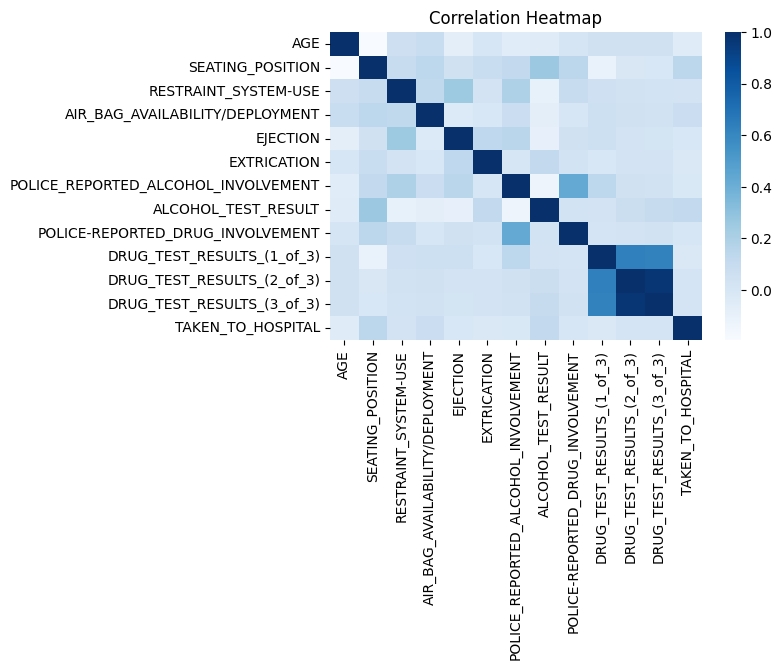

In [21]:
describe_dataset_v2(df_fars_scaled_5per100_oh, name="FARS Scaled Dataset (5%) with One-Hot")


===== FARS Scaled Dataset (1%) with One-Hot =====

=== Dataset shape ===
Rows: 100,968
Columns: 109

=== Missing values (dataset-level) ===
Total missing values: 0
Missing percentage (overall): 0.0000%
Columns with missing values: 0 / 109

=== Sparsity ===
Fraction of zero entries: 0.7248

=== Duplicate rows ===
Duplicate rows: 8,079

=== Feature types ===
bool        95
float64     13
category     1
Name: count, dtype: int64

=== Sparsity ===
Fraction of zero entries: 0.7248

=== Memory usage ===
Total memory usage: 19.26 MB



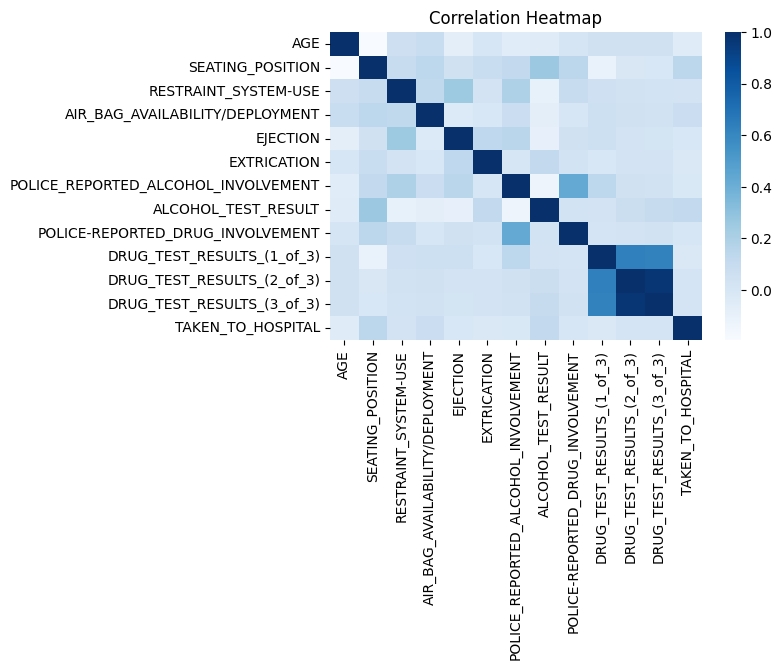

In [22]:
describe_dataset_v2(df_fars_scaled_1per100_oh, name="FARS Scaled Dataset (1%) with One-Hot")


===== FARS Scaled Dataset (5%) with simplex encoding =====

=== Dataset shape ===
Rows: 100,968
Columns: 48

=== Missing values (dataset-level) ===
Total missing values: 0
Missing percentage (overall): 0.0000%
Columns with missing values: 0 / 48

=== Sparsity ===
Fraction of zero entries: 0.0000

=== Duplicate rows ===
Duplicate rows: 14,917

=== Feature types ===
float64     47
category     1
Name: count, dtype: int64

=== Sparsity ===
Fraction of zero entries: 0.0000

=== Memory usage ===
Total memory usage: 36.30 MB



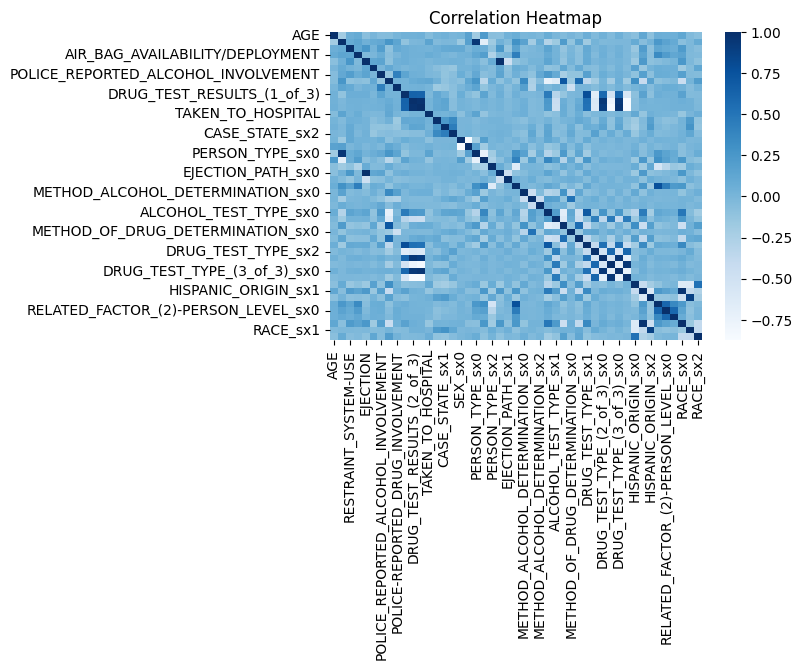

In [23]:
describe_dataset_v2(df_fars_scaled_5per100_sb, name="FARS Scaled Dataset (5%) with simplex encoding") 


===== FARS Scaled Dataset (1%) with simplex encoding =====

=== Dataset shape ===
Rows: 100,968
Columns: 93

=== Missing values (dataset-level) ===
Total missing values: 0
Missing percentage (overall): 0.0000%
Columns with missing values: 0 / 93

=== Sparsity ===
Fraction of zero entries: 0.0000

=== Duplicate rows ===
Duplicate rows: 8,079

=== Feature types ===
float64     92
category     1
Name: count, dtype: int64

=== Sparsity ===
Fraction of zero entries: 0.0000

=== Memory usage ===
Total memory usage: 70.97 MB



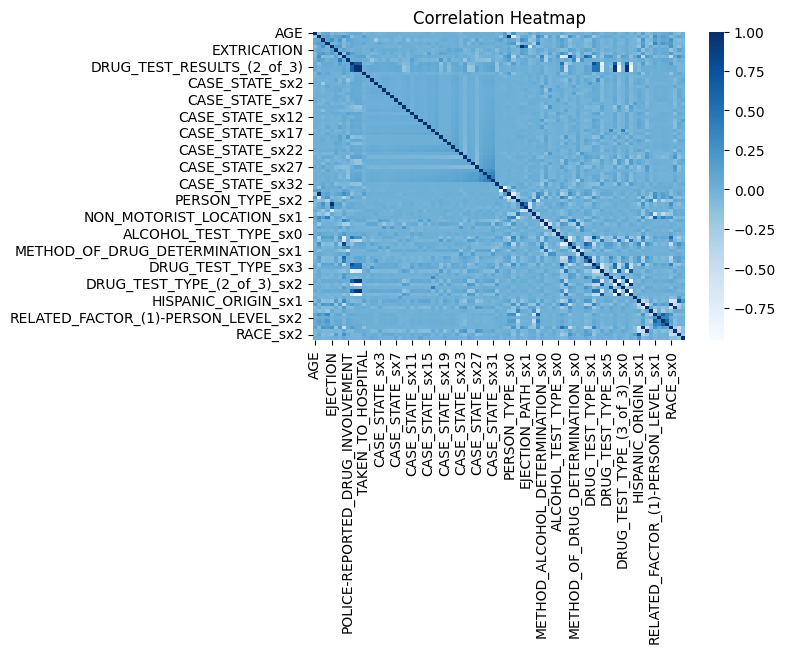

In [24]:
describe_dataset_v2(df_fars_scaled_1per100_sb, name="FARS Scaled Dataset (1%) with simplex encoding") 

# SOM Training & Exploration

We will start the SOM training phase here. Frist we will try to train the middle dataset using the 5% threshold, to get some kind of proof of concept if the data is suitable for SOM training and not too sparse. 

For this part we did not used the onthology because it made things earlier for the visualization as they cant be loaded in the onology. (At least we did found a way to load them somewhere else than the providet local host location)

## Loading the SOM Toolbox into the notebook.

NOTE: We have deactivated the loading of Time Series visualization functions (in 'somtoolbox.py') for now, since it requires a pip package that is not a pip package.

SOM toolbox path added: /Users/philippschott/Desktop/SOS_Assignment_3/Provided/SOMToolbox-main


/Users/philippschott/Desktop/SOS_Assignment_3/sos_venv/lib/python3.11/site-packages/panel/config.py:32: FutureWarning: param.version.Version has been deprecated and will be removed in a future version.
  __version__ = str(param.version.Version(
/Users/philippschott/Desktop/SOS_Assignment_3/sos_venv/lib/python3.11/site-packages/param/version.py:200: FutureWarning: param.version.run_cmd has been deprecated and will be removed in a future version.
  remotes = run_cmd([cmd, 'remote', '-v'],


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
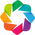

In [25]:


# Project root
PROJECT_ROOT = Path.cwd().parent

# SOM Toolbox Path
SOM_PATH = PROJECT_ROOT / "Provided" / "SOMToolbox-main"

sys.path.append(str(SOM_PATH))

print("SOM toolbox path added:", SOM_PATH)

from somtoolbox import SOMToolbox
from minisom import MiniSom

## SOM Training Phase

Reload the dataset and prepare it for SOM training.

After some trail and error we established the following 

### Hypothesis:

Reducing sparsity in categorical feature representations by replacing sparse one-hot encoding with dense equidistant (simplex-based) encodings leads to more stable SOM training, lower quantization error, and clearer cluster structures.

To test this we will start by comparing two datasets with the same threshold, but different encoding methods.

In [26]:
## Each Activity that follows is part of the SOM Training Phase

SOM_training_phase_executor = [
f':SOM_training_phase rdf:type prov:Activity .',
f':SOM_training_phase rdfs:label "SOM Training Phase" .', ## Phase 4: SOM Training
]
engine.insert(SOM_training_phase_executor, prefixes=prefixes)

### Helper Functions for SOM Training

#### Loading the datasets

In [27]:
def load_fars_pair(percent: float, base_path: str = "../data") -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Load paired FARS datasets (One-Hot + Simplex) for a given frequency threshold.

    Parameters
    ----------
    percent : float
        Frequency threshold:
        - 5   -> 5%
        - 1   -> 1%
        - 0.1 -> 0.1%
    base_path : str
        Base data directory
    """

    if percent == 5:
        suffix = "5per100"
    elif percent == 1:
        suffix = "1per100"
    elif percent == 0.1:
        suffix = "1per1000"
    else:
        raise ValueError("percent must be one of: 5, 1, 0.1")

    base = Path(base_path)

    path_oh = base / "one_hot" / f"fars_scaled_{suffix}_oh.csv.gz"
    path_sb = base / "simplex_encoding" / f"fars_scaled_{suffix}_sb.csv.gz"

    print(f"Loading datasets for {percent}% frequency threshold")
    print(f"   • One-Hot   : {path_oh.name}")
    print(f"   • Simplex  : {path_sb.name}")

    df_oh = pd.read_csv(path_oh)
    df_sb = pd.read_csv(path_sb)

    return df_oh, df_sb

#### Stratified Sampling

In [28]:
def stratfied_block(df:pd.DataFrame,STRATIFIED:bool = True,N_SAMPLES = 2_000, RANDOM_STATE = 42 ) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Stratified Block Sampling
    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame with a 'class' column for stratification.
    STRATIFIED : bool
        Whether to perform stratified sampling.
    N_SAMPLES : int
        Total number of samples to draw.
    RANDOM_STATE : int
        Random seed for reproducibility.
    Returns
    ----------
    X : pd.DataFrame
        Feature DataFrame after sampling.
    y : pd.Series
        Target Series after sampling.
    """
    

    # ---- Sampling ----
    if STRATIFIED:
        df_sampled = (
            df
            .groupby("class", group_keys=False)
            .apply(
                lambda g: g.sample(
                    n=max(1, int(N_SAMPLES * len(g) / len(df))),
                    random_state=RANDOM_STATE
                )
            )
        )
    else:
        df_sampled = df.sample(
            n=N_SAMPLES,
            random_state=RANDOM_STATE
        )

    df_sampled = df_sampled.reset_index(drop=True)

    print("Sampled shape:", df_sampled.shape)

    # ---- Split X / y ----
    y = df_sampled["class"].values
    X = df_sampled.drop(columns=["class"])

    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

#### SOM Training

In [29]:
def train_soms(X:pd.DataFrame,
               y:np.array,
               n_ratio:float,
               sigma:float = 1,
               learning_rate:float = 0.5,
               iterations = 1000,
               verbose:int = 1,
               size_var:float = 1.0,
               random_state:int = 42
               ) -> Tuple[MiniSom, float, float, Tuple[int,int], int]:
    """
    Train Self-Organizing Map (SOM) using MiniSom and visualize with SOMToolbox.
    Parameters
    ----------
    X : pd.DataFrame
        Feature DataFrame for training.
    y : np.array
        Target array for visualization.
    n_ratio : float
        Aspect ratio for SOM grid (n/m).
    sigma : float
        Initial neighborhood radius.
    learning_rate : float
        Initial learning rate.
    iterations : int
        Number of training iterations.
    verbose : int
        Verbosity level (0 = silent, 1 = progress).
    size_var : float
        Size scaling factor for SOM grid.
    random_state : int
        Random seed for reproducibility.
    """

    # Calculate SOM-Parameter
    N = size_var* math.sqrt(5* math.sqrt(X.shape[0] * X.shape[1]))
    m, n = int(round(n_ratio* N,0)), int(round(N,0)) 
    dim = (n,m)
    sum_nodes = (n*m)
    if verbose == 1:  
        print("N and n*m",(round(N,0),(m*n))) # SOM-Gitter

    # MiniSom TRAINING
    X_np = X.values.astype(np.float32)
    y_np = y.astype(np.int32)
    som = MiniSom(
        x=m,
        y=n,
        input_len=X_np.shape[1],
        learning_rate=learning_rate,
        sigma = sigma,
        neighborhood_function='gaussian',
        activation_distance='euclidean',
        random_seed = random_state
        
    )

    print("▶ Training startet …")
    som.train_random(
        data=X_np,
        num_iteration=iterations
    )
    print("✔ Training abgeschlossen")

    # SOMToolbox WEIGHTS EXTRAKTION
    # MiniSom → (m, n, dim)
    weights_3d = som.get_weights()

    # SOMToolbox → (m*n, dim)
    weights_flat = weights_3d.reshape(m * n, X_np.shape[1])
    print("Weights shape:", weights_3d.shape)   # (m, n, dim)

    # SOMToolbox VISUALISIERUNG
    som_view = SOMToolbox(
        m=m,
        n=n,
        dimension=X_np.shape[1],
        weights=weights_flat,
        input_data=X_np,
        classes=y_np,
        component_names=None
    )

    # Visualization in browser etc.
    print("✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)")
    som_view._onbigscreen()
    quant_error = som.quantization_error(data = X_np)
    topo_error = som.topographic_error(data = X_np)
    print("Quantizitation error:", quant_error)
    print("Topoligical Error:", topo_error)
    return som, quant_error,topo_error,dim, sum_nodes

In [30]:
def SOM_pipeline_both(sigma:float =1, percent:float = 5, N_stratified:int=2000, ratio:float =1.5, iterations:int=1000, size_var:float = 1, random_state:int = 42):
    df_oh, df_sd = load_fars_pair(percent= percent)
    stratified_oh_x, stratified_oh_y = stratfied_block(df_oh,N_SAMPLES=N_stratified)
    stratified_sd_x,stratified_sd_y = stratfied_block(df_sd,N_SAMPLES=N_stratified)
    _,quant_error_oh,topo_error_oh, dim_oh, sum_nodes_oh = train_soms(X=stratified_oh_x,
               y=stratified_oh_y,
               n_ratio= ratio,
               iterations = iterations,
               size_var=size_var,
               sigma = sigma,
               random_state = random_state)
    _,quant_error_sd,topo_error_sd,dim_sd, sum_nodes_sd  = train_soms(X=stratified_sd_x,
               y=stratified_sd_y,
               n_ratio= ratio,
               iterations = iterations,
               size_var=size_var,
               sigma=sigma,
               random_state = random_state)
    return quant_error_oh,topo_error_oh,dim_oh, sum_nodes_oh, quant_error_sd,topo_error_sd, dim_sd, sum_nodes_sd


### Task 1

Train a reasonably sized „regular" SOM

In [32]:
quant_error_oh, topo_error_oh, dim_oh, sum_nodes_oh, \
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_both(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1
)

print("\n" + "=" * 70)
print("SOM PIPELINE RESULTS")
print("=" * 70)

print("\n[STRATIFIED OH DATASET]")
print(f"Quantization Error        : {quant_error_oh:.6f}")
print(f"Topographic Error         : {topo_error_oh:.6f}")
print(f"SOM Dimensionality        : {dim_oh}")
print(f"Total Activated Nodes     : {sum_nodes_oh}")


print("\n[STRATIFIED SD DATASET]")
print(f"Quantization Error        : {quant_error_sd:.6f}")
print(f"Topographic Error         : {topo_error_sd:.6f}")
print(f"SOM Dimensionality        : {dim_sd}")
print(f"Total Activated Nodes     : {sum_nodes_sd}")


print("\n" + "=" * 70)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_87282/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(
/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_87282/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 64)
X shape: (1997, 63)
y shape: (1997,)
Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (42.0, 2646)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (63, 42, 63)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:63821
Quantizitation error: 1.684121773478719
Topoligical Error: 0.2884326489734602
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:63842
Quantizitation error: 2.789541326213808
Topoligical Error: 0.21181772658988482

SOM PIPELINE RESULTS

[STRATIFIED OH DATASET]
Quantization Error        : 1.684122
Topographic Error         : 0.288433
SOM Dimensionality        : (42, 63)
Total Activated Nodes     : 2646

[STRATIFIED SD DATASET]
Quantization Error        : 2.789541
Topographic Error     

### Task 2

Analyze different initializations of the SOM:

In [33]:
def SOM_pipeline_sd(sigma:float =1, percent:float = 5, N_stratified:int=2000, ratio:float =1.5, iterations:int=1000, size_var:float = 1, random_state:int = 42, learningrate:float = 0.5):
    df_oh, df_sd = load_fars_pair(percent= percent)
    stratified_sd_x,stratified_sd_y = stratfied_block(df_sd,N_SAMPLES=N_stratified)

    _,quant_error_sd,topo_error_sd,dim_sd, sum_nodes_sd  = train_soms(X=stratified_sd_x,
               y=stratified_sd_y,
               n_ratio= ratio,
               iterations = iterations,
               size_var=size_var,
               sigma=sigma,
               random_state = random_state,
               learning_rate=learningrate)
    print("\n" + "=" * 70)
    print("SOM PIPELINE RESULTS")
    print("=" * 70)


    print("\n[STRATIFIED SD DATASET]")
    print(f"Quantization Error        : {quant_error_sd:.6f}")
    print(f"Topographic Error         : {topo_error_sd:.6f}")
    print(f"SOM Dimensionality        : {dim_sd}")
    print(f"Total Activated Nodes     : {sum_nodes_sd}")


    print("\n" + "=" * 70)
    return quant_error_sd,topo_error_sd, dim_sd, sum_nodes_sd

quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state= 1000 # different random state
)


Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_87282/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:64124
Quantizitation error: 2.790023583420522
Topoligical Error: 0.19479218828242365

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.790024
Topographic Error         : 0.194792
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301



[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.00675676 0.00675676 0.00675676 0.00675676]
[0.00033784]
[]
[0.0097973 0.0097973 0.0097973 0.0097973]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.00168919]
[0.00202703 0.00202703]
[0.00472973]
[0.00236486]
[0.00945946 0.00945946 0.00945946 0.00945946]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.00439189 0.00439189 0.00439189 0.00439189]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [34]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state=38 # different random state
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_87282/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:64811
Quantizitation error: 2.738514203187847
Topoligical Error: 0.15623435152729093

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.738514
Topographic Error         : 0.156234
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301



[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

### Task3

Analyze different map sizes:

In [ ]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 3, # increased size
    random_state= 1000
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (117.0, 20592)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (176, 117, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:56631
Quantizitation error: 2.7589746512628115
Topoligical Error: 0.2613920881321983

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.758975
Topographic Error         : 0.261392
SOM Dimensionality        : (117, 176)
Total Activated Nodes     : 20592



In [ ]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 0.5, # decreased size
    random_state= 1000
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (20.0, 580)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (29, 20, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:56761
Quantizitation error: 2.7807441063307428
Topoligical Error: 0.1402103154732098

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.780744
Topographic Error         : 0.140210
SOM Dimensionality        : (20, 29)
Total Activated Nodes     : 580



### Task 4

Analyze different initial neighborhood radius settings:

In [ ]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=0.1, # decreased sigma
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state= 1000
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:56829
Quantizitation error: 3.8021936716761653
Topoligical Error: 1.0

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 3.802194
Topographic Error         : 1.000000
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301



In [ ]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=5, # increased sigma
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state= 1000
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:56906
Quantizitation error: 2.7871892509001803
Topoligical Error: 0.02103154732098147

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.787189
Topographic Error         : 0.021032
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301



### Task 5

Analyze different initial learning rates:

In [ ]:
quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state= 1000,
    learningrate=2 # increase learning rate
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:56972
Quantizitation error: 2.1230911096819125
Topoligical Error: 0.4046069103655483

SOM PIPELINE RESULTS

[STRATIFIED SD DATASET]
Quantization Error        : 2.123091
Topographic Error         : 0.404607
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301



In [ ]:
def SOM_pipeline_sd(sigma:float =1, percent:float = 5, N_stratified:int=2000, ratio:float =1.5, iterations:int=1000, size_var:float = 1, random_state:int = 42, learningrate:float = 0.5):
    df_oh, df_sd = load_fars_pair(percent= percent)
    stratified_sd_x,stratified_sd_y = stratfied_block(df_sd,N_SAMPLES=N_stratified)

    _,quant_error_sd,topo_error_sd,dim_sd, sum_nodes_sd  = train_soms(X=stratified_sd_x,
               y=stratified_sd_y,
               n_ratio= ratio,
               iterations = iterations,
               size_var=size_var,
               sigma=sigma,
               random_state = random_state,
               learning_rate=learningrate)
    print("\n" + "=" * 70)
    print("SOM PIPELINE RESULTS")
    print("=" * 70)
    print("[STRATIFIED SD DATASET]")
    print(f"Quantization Error        : {quant_error_sd:.6f}")
    print(f"Topographic Error         : {topo_error_sd:.6f}")
    print(f"SOM Dimensionality        : {dim_sd}")
    print(f"Total Activated Nodes     : {sum_nodes_sd}")
    print(f"Learningrate    :         : {learningrate}")
    print("\n" + "=" * 70)
    return quant_error_sd,topo_error_sd, dim_sd, sum_nodes_sd

quant_error_sd, topo_error_sd, dim_sd, sum_nodes_sd = SOM_pipeline_sd(
    sigma=1,
    percent=5,
    N_stratified=2000,
    ratio=1.5,
    iterations=1000,
    size_var = 1,
    random_state= 1000,
    learningrate=0.1 # decrease learning rate
)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57034
Quantizitation error: 3.804831000205505
Topoligical Error: 0.2613920881321983

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 3.804831
Topographic Error         : 0.261392
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Learningrate    :         : 0.1



### Task 6

Analyze different max iterations:

In [ ]:
def SOM_pipeline_sd(sigma:float =1, percent:float = 5, N_stratified:int=2000, ratio:float =1.5, iterations:int=1000, size_var:float = 1, random_state:int = 42, learningrate:float = 0.5):
    df_oh, df_sd = load_fars_pair(percent= percent)
    stratified_sd_x,stratified_sd_y = stratfied_block(df_sd,N_SAMPLES=N_stratified)

    _,quant_error_sd,topo_error_sd,dim_sd, sum_nodes_sd  = train_soms(X=stratified_sd_x,
               y=stratified_sd_y,
               n_ratio= ratio,
               iterations = iterations,
               size_var=size_var,
               sigma=sigma,
               random_state = random_state,
               learning_rate=learningrate)
    print("\n" + "=" * 70)
    print("SOM PIPELINE RESULTS")
    print("=" * 70)
    print("[STRATIFIED SD DATASET]")
    print(f"Quantization Error        : {quant_error_sd:.6f}")
    print(f"Topographic Error         : {topo_error_sd:.6f}")
    print(f"SOM Dimensionality        : {dim_sd}")
    print(f"Total Activated Nodes     : {sum_nodes_sd}")
    print(f"Iterations                : {iterations}")
    print("\n" + "=" * 70)
    return quant_error_sd,topo_error_sd, dim_sd, sum_nodes_sd

iterations = [2, 5, 10, 50, 100, 1000, 5000, 10000]
for number in iterations:
    SOM_pipeline_sd(iterations = number)

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57092
Quantizitation error: 5.588513766853493
Topoligical Error: 0.829243865798698

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 5.588514
Topographic Error         : 0.829244
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 2

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57133
Quantizitation error: 5.441763470587033
Topoligical Error: 0.7531296945418127

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 5.441763
Topographic Error         : 0.753130
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 5

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57178
Quantizitation error: 5.140060133801289
Topoligical Error: 0.8067100650976464

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 5.140060
Topographic Error         : 0.806710
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 10

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57220
Quantizitation error: 4.761514500927758
Topoligical Error: 0.5363044566850276

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 4.761515
Topographic Error         : 0.536304
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 50

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57263
Quantizitation error: 4.531622734177984
Topoligical Error: 0.4927391086629945

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 4.531623
Topographic Error         : 0.492739
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 100

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57320
Quantizitation error: 2.789541326213808
Topoligical Error: 0.21181772658988482

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 2.789541
Topographic Error         : 0.211818
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 1000

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57419
Quantizitation error: 1.6336352614200194
Topoligical Error: 0.12268402603905859

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 1.633635
Topographic Error         : 0.122684
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 5000

Loading datasets for 5% frequency threshold
   • One-Hot   : fars_scaled_5per100_oh.csv.gz
   • Simplex  : fars_scaled_5per100_sb.csv.gz


/var/folders/m8/_jvb3nld7fv7yvqpcwjsczv40000gn/T/ipykernel_85223/3965104445.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Sampled shape: (1997, 48)
X shape: (1997, 47)
y shape: (1997,)
N and n*m (39.0, 2301)
▶ Training startet …
✔ Training abgeschlossen
Weights shape: (59, 39, 47)
✔ SOMToolbox bereit - Visualisierung wird geladen (über localhost im browser!!!)
Launching server at http://localhost:57545
Quantizitation error: 1.330264159995287
Topoligical Error: 0.12218327491236855

SOM PIPELINE RESULTS
[STRATIFIED SD DATASET]
Quantization Error        : 1.330264
Topographic Error         : 0.122183
SOM Dimensionality        : (39, 59)
Total Activated Nodes     : 2301
Iterations                : 10000



# Detailed analysis of an „Optimal SOM":

In [ ]:
bla

# Generate Latex Report

The following cells give you an example of how to automatically create a Latex Report from your provenance documentation.

Feel free to use the example provided. If you use it, you should adapt and extend it with relevant sections/tables/plots/... 

In [ ]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [ ]:
# This cell includes cleaning functions

from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

Everything above was copied from the template notebook, everything below was edited to fit our needs.

Everything with double "# ----------------------------" should be fine.

In [ ]:
# This cell includes exemplary queries for different phases

base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"
print(f"Fetching data ONLY for: {base_iri}")

prefix_header = f"""
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX sc: <https://schema.org/>
PREFIX cr: <http://mlcommons.org/croissant/>
PREFIX mls: <http://www.w3.org/ns/mls#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX : <{base_iri}>
"""
# ----------------------------
### Author Block
# ----------------------------
author_query = f"""
{prefix_header}
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}
  
  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""
res_authors = engine.query(author_query)
author_block_latex = ""

if not res_authors.empty: # type:ignore
    for _, row in res_authors.iterrows(): # type:ignore

        uri_str = str(row['uri'])
        given = latex_escape(clean_rdf(row['given']))
        family = latex_escape(clean_rdf(row['family']))
        matr = latex_escape(clean_rdf(row['matr']))
        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"
        
        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

# ----------------------------
### Business Understanding
# ----------------------------
bu_query = f"""
{prefix_header}
SELECT ?comment WHERE {{
  OPTIONAL {{ :business_understanding rdfs:comment ?comment . }}
}} LIMIT 1
"""
res_bu = engine.query(bu_query)
bu_text = latex_escape(clean_rdf(res_bu.iloc[0]["comment"])) if not res_bu.empty else "" # type:ignore

# ----------------------------
### Data Understanding 
# ----------------------------
du_query = f"""
{prefix_header}
SELECT ?comment WHERE {{
  OPTIONAL {{ :data_understanding_load_fars rdfs:comment ?comment . }}
}}
LIMIT 1
"""
res_du = engine.query(du_query)
du_text = latex_escape(clean_rdf(res_du.iloc[0]["comment"])) if not res_du.empty else "" # type:ignore

# ----------------------------
### Data Preparation
# ----------------------------
# Decoding Categorical Attributes
dp_decode_query = f"""
{prefix_header}
SELECT ?comment WHERE {{
  OPTIONAL {{ :data_preparation_decode rdfs:comment ?comment . }}
}}
LIMIT 1
"""
res_dp_decode = engine.query(dp_decode_query)
dp_decode_text = latex_escape(clean_rdf(res_dp_decode.iloc[0]["comment"])) if not res_dp_decode.empty else "" #type:ignore

# Feature Encoding and Scaling for SOM 
# (since some different comments where pushed)
dp_all_comments_query = f"""
{prefix_header}
SELECT DISTINCT ?comment WHERE {{
  ?activity rdf:type prov:Activity .
  ?activity sc:isPartOf :data_preprocessing_phase .
  ?activity rdfs:comment ?comment .
}}
"""
res_dp_all = engine.query(dp_all_comments_query)

dp_all_comments_latex = "\n\n\\bigskip\n\n".join(
    latex_escape(clean_rdf(row["comment"]))
    for _, row in res_dp_all.iterrows()
) if not res_dp_all.empty else "" #type:ignore

# ----------------------------
# please change but i have left it like it was for now
### Modeling example
# Hyperparameters
hp_query = f"""
{prefix_header}
SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}} 
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = engine.query(hp_query)
hp_rows = []
if not res_hp.empty: #type:ignore
    for _, row in res_hp.iterrows(): #type:ignore
        name = latex_escape(clean_rdf(row['hpName']))
        val  = latex_escape(clean_rdf(row['hpVal']))
        desc = latex_escape(clean_rdf(row.get('hpDesc', '')))
        hp_rows.append(rf"{name} & {desc} & {val} \\")

hp_table_rows = "\n    ".join(hp_rows)

# Run Info
run_query = f"""
{prefix_header}
SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = engine.query(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {} #type:ignore
mod_algo  = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end   = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get('metricVal', ''))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

print("Data extraction done.")

Fetching data ONLY for: https://starvers.ec.tuwien.ac.at/BI2025/13/
Data extraction done.


The following includes the Latex report itself. It fills in the query-results from the cell before. The ACM Template is already filled. 
Make sure that you update Student A and B accordingly.

In [ ]:
latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2025}}
\acmYear{{2026}}
\acmDOI{{XXXXXXX.XXXXXXX}}

\acmConference[SOS 2025]{{Self Organizing Systems}}{{-}}{{-}}

\begin{{document}}

\title{{ SOS2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}
{bu_text}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} 
{du_text}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}
\subsection{{Decoding of Categorical Attributes}}
{dp_decode_text}

\subsection{{Feature Encoding and Scaling}}
{dp_all_comments_latex}

\textit{{Note:}} This section may be a bit chaotic but it represents our thought process during data preparation for SOM training.
This represents the main steps we took to make the data suitable for SOMs which turned out to be not straightforward, 
since we wanted to avoid sparsity in categorical encodings.

%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings:

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} = {mod_m_val}
\end{{itemize}}

%% --- 5. Evaluation ---
\section{{Evaluation}}

%% --- 6. Deployment ---
\section{{Deployment}}

\section{{Conclusion}}

\end{{document}}
"""

In [ ]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "experiment_report_proof_of_concept.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: report/experiment_report_proof_of_concept.tex
